# Project: Investigate a Dataset (Gun Trends in US states) 
by Faustina
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset explores data on the trend of gun purchase in the USA. The data was sourced from the FBI's National Instant Criminal Background Check System and presents monthly purchases of different guns in all fifty (50) US states from the year 1998 till 2017. The month column begins september, 2017 and runs till November, 1998 while the states column shows all the US states for each month. Permit column contains number of gun owners that acquired permits to own their guns, the permits_recheck column, shows the number of gun owners who had their license rechecked, the handgun, long_gun, other and multiple columns display the amount of guns purchased per month, the prepawn_handgun, prepawn_long_gun and prepawn_other columns show the number of purchased guns that were not previously pawned, the redemption_handgun, redemption_long_gun and redemption_other columns present the number of pawned guns that have been re-acquired, the returned_handgun, returned_long_gun and returned_other columns present the amount of purchased guns that were returned to seller, the rentals_handgun, rentals_long_gun and, rentals_other shows the number of guns that were rented, the private_sale_handgun, private_sale_long_gun and private_ sale_other columns consist the number of guns that were purchased illegally, the return_to_seller_handguns, return_to_seller_long_guns, and return_to_seller_others columns contain the number of purchased guns that were returned to original seller, and the total sums up the total number of guns purchased.

### Question(s) for Analysis
The following questions were considered
#### What is the trend of gun purchases from 1998 to 2017?
#### What year has the most number of purchases? (Both legal and illegal)?
#### What Gun type is purchased the most?
#### What year were gun permits acquired the most?
#### Do the number of acquired permits correspond to frequency of gun purchase?
These questions were posed, in order to know the trend of gun purchases in the US during the sample period, the year with the most number of purchases, the gun most preferred, when permits were most acquired, and the equivalence of purchased guns to acquired permits.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Above are statements that were used to import all the packages that will be needed during this research. The magic word utilized here is the matplotlib inline. Comments explaining all the steps carried out and my thought process will be made in markdown boxes either above or below the codes.

<a id='wrangling'></a>
## Data Wrangling


The csv data to be analysed was loaded.

In [2]:
df_gun = pd.read_csv('gun_data.csv')
df_gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [3]:
df_gun.duplicated()
sum(df_gun.duplicated())

0

There were no duplicates in the data. So I went ahead to check the data information and found missing data and incorrect data types.

In [4]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

### Data Cleaning

Given that the questions posed for analysis only uses the year and not month or date, I decided to change the column header to 'year' before changing the contents of the column. This was done at this point to avoid interference down the line.

In [5]:
labels = ['year', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'prepawn_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other', 'totals']
df_gun = pd.read_csv('gun_data.csv', header=1, names=labels)
df_gun.head()

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
1,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
2,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
3,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
4,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873


In [6]:
df_gun['year'] = pd.to_datetime(df_gun['year'])
df_gun.head()

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
1,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
2,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
3,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
4,2017-09-01,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873


The datatype of the year column by default was 'object'. In order to extract the year, it needed to be converted to datetime format. This was carried out as seen above.

After conversion, the year was then extracted from the column. This is shown in the dataframe below.

In [7]:
df_gun['year'] = pd.DatetimeIndex(df_gun['year']).year
df_gun.head(10)

,year,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
1,2017,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
2,2017,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
3,2017,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
4,2017,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873
5,2017,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12117
6,2017,Delaware,275.0,0.0,1414.0,1538.0,66.0,68,0.0,0.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,0.0,3502
7,2017,District of Columbia,1.0,0.0,56.0,4.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61
8,2017,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390
9,2017,Georgia,12074.0,0.0,10933.0,7982.0,315.0,494,0.0,20.0,...,0.0,0.0,0.0,17.0,7.0,0.0,0.0,0.0,0.0,35371


To make the dataframe a lot easier to view and plot, unwanted columns were dropped below. 

In [8]:
df_gun.drop(['admin', 'prepawn_handgun', 'prepawn_long_gun', 'redemption_handgun', 'redemption_long_gun', 'redemption_other', 'prepawn_other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'rentals_handgun', 'rentals_long_gun', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other', 'multiple'], axis = 1, inplace = True)
df_gun.head()

,year,state,permit,permit_recheck,handgun,long_gun,other,private_sale_handgun,private_sale_long_gun,private_sale_other,totals
0,2017,Alaska,209.0,2.0,2320.0,2930.0,219.0,17.0,24.0,1.0,6303
1,2017,Arizona,5069.0,382.0,11063.0,7946.0,920.0,38.0,12.0,2.0,28394
2,2017,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,13.0,23.0,0.0,17747
3,2017,California,57839.0,0.0,37165.0,24581.0,2984.0,0.0,0.0,0.0,123506
4,2017,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,0.0,0.0,0.0,35873


Recalling that missing data was also observed above, fillna was utilized here to fill up the empty cells and as can be seen below, all rows now have complete data and the year column is in integer format.

In [9]:
mean = df_gun['other'].mean()
df_gun['other'].fillna(mean, inplace = True)
mean = df_gun['permit_recheck'].mean()
df_gun['permit_recheck'].fillna(mean, inplace = True)
mean = df_gun['permit'].mean()
df_gun['permit'].fillna(mean, inplace = True) 
mean = df_gun['private_sale_handgun'].mean()
df_gun['private_sale_handgun'].fillna(mean, inplace = True)
mean = df_gun['private_sale_long_gun'].mean()
df_gun['private_sale_long_gun'].fillna(mean, inplace = True)
mean = df_gun['private_sale_other'].mean()
df_gun['private_sale_other'].fillna(mean, inplace = True)
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12484 entries, 0 to 12483
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   12484 non-null  int64  
 1   state                  12484 non-null  object 
 2   permit                 12484 non-null  float64
 3   permit_recheck         12484 non-null  float64
 4   handgun                12464 non-null  float64
 5   long_gun               12465 non-null  float64
 6   other                  12484 non-null  float64
 7   private_sale_handgun   12484 non-null  float64
 8   private_sale_long_gun  12484 non-null  float64
 9   private_sale_other     12484 non-null  float64
 10  totals                 12484 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 1.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

Before I began plotting, I wanted to observe each columns and their relationships with each other

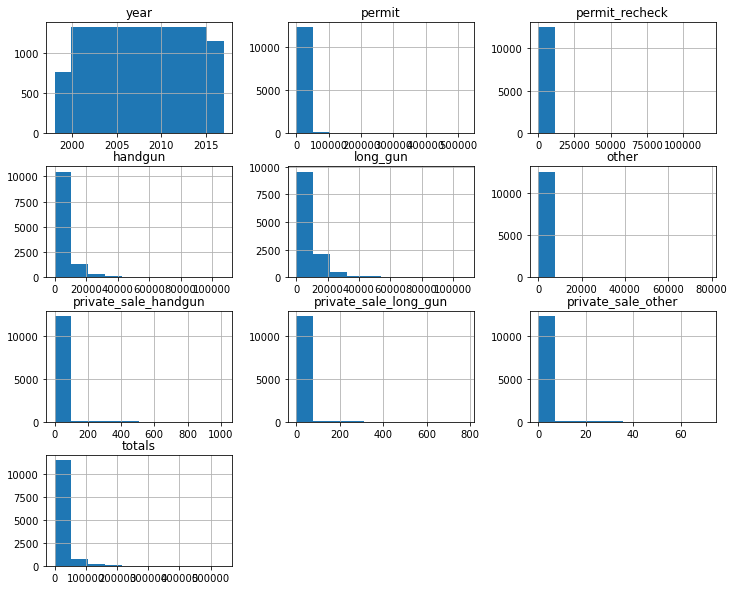

In [10]:
df_gun.hist(figsize = (12, 10));

### Research Question 1 (What is the trend of gun purchases between 1988 and 2017?)

This question was posed as first, to enable me understand the overall view of gun purchase on the national scale. To know what it has benn in the past years, how it has grown and how the new lifestyle of purchasing a gun(s) has been recieved by the populace. 

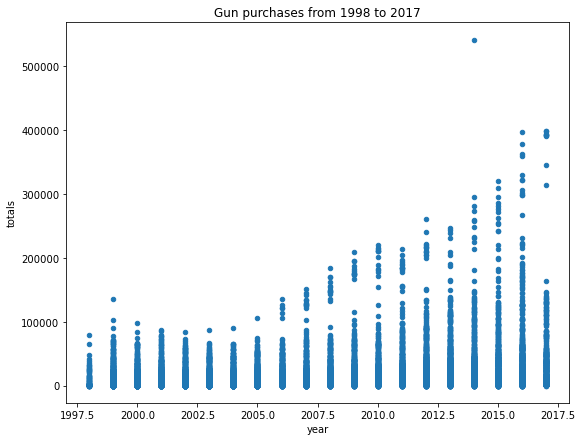

In [11]:
df_gun.plot(x = 'year', y = 'totals', kind = 'scatter', figsize= (9, 7))
plt.title('Gun purchases from 1998 to 2017');

The first question is to find out the trend of gun purchase from 1998 to 2017. The year column which contains said years was plotted against the total number of guns purchased to obtain the overall trend of gun purchase during the years. This displayed a positive correlation, with purchases peaking around 2014 and this is followed by 2016 and 2017. The plot's increase begins in 1998(lowest) and shows positive correlation in gun purchases with the gradual ascent through the years.

### Research Question 2  (What year has the most number of purchases? (Both legal and illegal)

#### Year with the highest number of legal purchases
This question will begin with the number of legal purchases. It inquires into the nature of means by which purchasers acquire these tools. Here, the year column will be plotted against the number of handguns, long guns and other firearms purchased. All columns to be used for this question are already in adequate format. Hence, data types will remain the same.

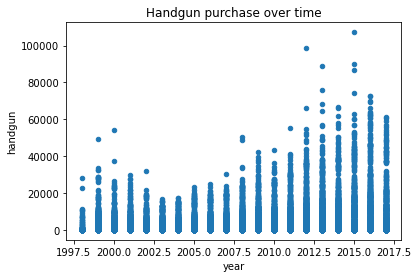

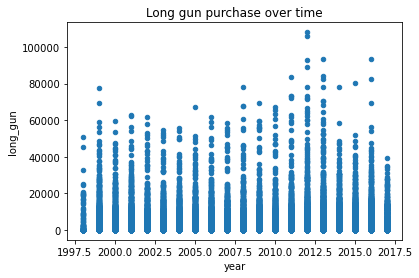

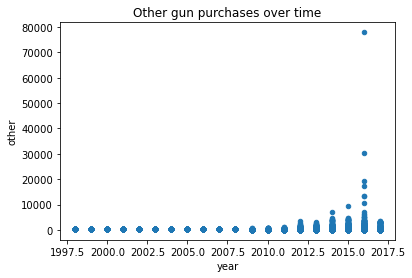

In [12]:
df_gun.plot(x = 'year', y = 'handgun', kind = 'scatter')
plt.title('Handgun purchase over time')
df_gun.plot(x = 'year', y = 'long_gun', kind = 'scatter')
plt.title('Long gun purchase over time')
df_gun.plot(x = 'year', y = 'other', kind = 'scatter')
plt.title('Other gun purchases over time');

The above plots, all comprise a peak and a few outliers. Long guns have always been preferred most over the years. However, handguns were a lot more popular in 2015 whereas, long gun puchases peaked around 2011/2012. All other firearms have had lower purchase rates through the years and even when purchases rose around 2016, the rates were still low in comparison to handgun and long gun purchases at the time.

#### Year with the highest number of illegal purchases
Similar to what was carried out in the above cell, the year with the highest number of illegal purchases will be found by plotting the year against private sale handgun, private sale long gun and private sale other.

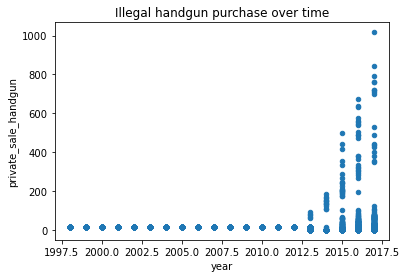

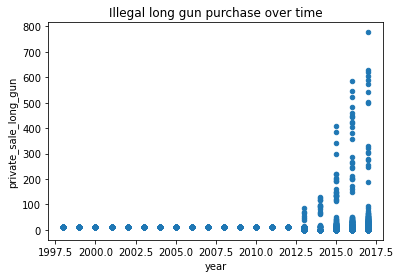

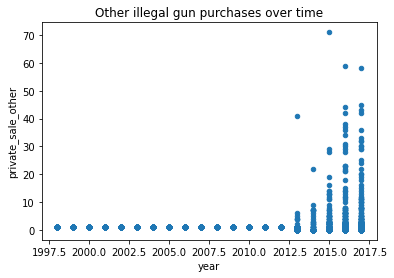

In [13]:
df_gun.plot(x = 'year', y = 'private_sale_handgun', kind = 'scatter')
plt.title('Illegal handgun purchase over time')
df_gun.plot(x = 'year', y = 'private_sale_long_gun', kind = 'scatter')
plt.title('Illegal long gun purchase over time')
df_gun.plot(x = 'year', y = 'private_sale_other', kind = 'scatter')
plt.title('Other illegal gun purchases over time');

The trend of illegal gun purchase over the years are shown to be quite similar regardless of gun type. All the above plots show that illegal gun purchase was negligible in the late 20th century (1998, 1999) and early 21st century (2000 - 2012). It began to rise starting mid 2012 and acclimated in 2017 for both handgun and long gun and in 2015/2016 for other gun types. 

### Research Question 3 (What Gun type is purchased the most?)

This question seeks to know the gun type that is most favourable to the consumers at large. It also lets you decipher the manner which majority of consumers convey their guns. To answer this question, a function was created and then handgun, long gun, and other columns were compared using a bar chart.

In [14]:
def figure(DataFrame, y_label, title, size):
    DataFrame.plot.bar(figsize=size)
    plt.ylabel(y_label)
    plt.title(title, fontsize=14)
    plt.show()

In [15]:
#defining the dataframe
gun_types = df_gun.loc[:,["handgun", "long_gun", "other"]].mean()
df_gtype = gun_types.head(). T
df_gtype

handgun     5940.897705
long_gun    7810.967188
other        360.496999
dtype: float64

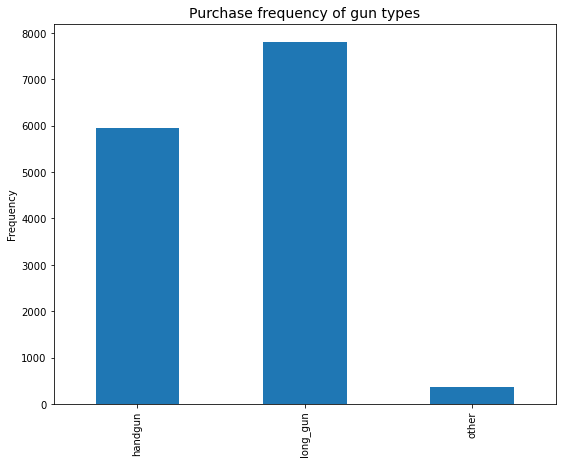

In [16]:
figure(df_gtype, 'Frequency', 'Purchase frequency of gun types', (9,7))

The visualization above shows that long guns have always been preferred more than hand guns and other guns in all US states over the sample period. Other guns are shown to be favoured less significantly in comparison to other gun types.

#### Research Question 4 (What year were gun permits acquired the most?)

This question was proffered keeping in mind, the law and safety of other gun users. It also provides insight on the involvement of the government and other gun control agencies in the manufacture and sale of guns in all US states.

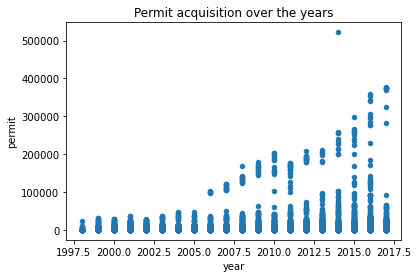

In [17]:
df_gun.plot(x = 'year', y = 'permit', kind = 'scatter')
plt.title('Permit acquisition over the years');

The year was plotted against the number of permits, resulting in the above plot. Gun permits are shown to have been acquired more in recent years although the maximum number of acquired permits throughout the sample period (1998 - 2017), is shown to have occured around 2016. The plot above also shows that acquiring gun permits was less sought after compared to recent years with the lowest point being in 1998. This shows a positive correlation between permit and year. 

#### Research Question 5 (Do the number of acquired permits correspond to frequency of gun purchase?)

This final question was considered so as to know the extent of gun control in US states and how legal most gun purchases are. 

In [18]:
gun_func = df_gun.loc[:,["permit", "totals"]].mean()
df_gunctrl = gun_func.head(). T
df_gunctrl

permit     6412.802488
totals    21594.890980
dtype: float64

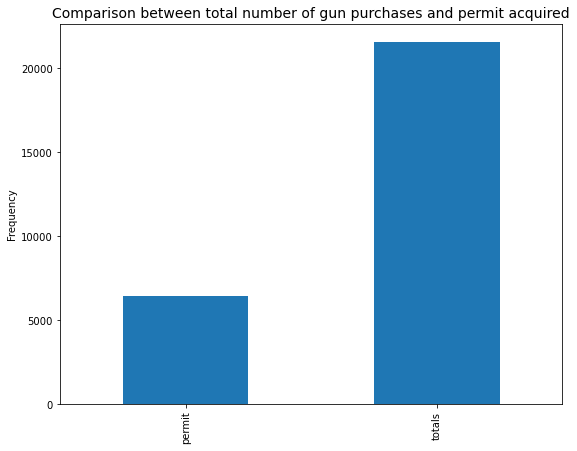

In [19]:
figure(df_gunctrl, 'Frequency', 'Comparison between total number of gun purchases and permit acquired', (9,7))

According to the NICS data, "...many checks are for concealed carry permits, not actual gun sales." The above plot confirms this statement as the ratio of total number of guns purchased to number of legal gun ownership permits acquired is significantly negative.

<a id='conclusions'></a>
## Conclusions

Analysis was carried out on data which was sourced from the FBI's National Instant Criminal Background Check System to discover the trends of gun purchases in US states. Questions considered are the trend of gun purchases from 1998 to 2017, the year with the most number of purchases, most purchased gun type, the year of most acquired gun permits and the correspondence of acquired permits to gun purchase. 
After careful analysis, it was discovered that overall, gun purchases in US states have increased quite significantly between 1998 and 2017. Generally, purchases soared as from 2011. However in recent years (2015, 2016, 2017), it has been particularly high especially in the purchase of long guns which is shown to be an all time favorite through the years. The spike in illegal gun purchases which was previously negligible has risen alarmingly since 2012. This is coupled with inefficiencies in source data documentation which has been confirmed to be true by findings from the fifth (5th) research question. Therefore, even though there was a spike in the the acquisition of legal permits particularly in 2016, this statement from the FBI, 2022 that states "...the statistics represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold", has shown that most of the permit acquisitions are for concealed carry and not for the actual guns themselves. This could be modelled to similar trends as it may throw some light on the possible issue of gun control as a problem on a national scale. 

### References
FBI NICS Firearm Background Check Data, 2022. https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md.
